In [1]:
%pylab --no-import-all inline
from __future__ import division
import matplotlib.pyplot as plt
import random
import time
import itertools
import urllib
import csv

Populating the interactive namespace from numpy and matplotlib


In [2]:
def alltours_tsp(cities):
    return shortest_tour(alltours(cities))

def shortest_tour(tours): 
    return min(tours, key=tour_length)

alltours = itertools.permutations 
def tour_length(tour):
    return sum(distance(tour[i], tour[i-1]) 
               for i in range(len(tour)))

# TO DO: Functions: distance, Data types: cities

In [3]:
# Cities are represented as Points, which are represented as complex numbers
Point = complex
City  = Point

def X(point): 
    "The x coordinate of a point."
    return point.real

def Y(point): 
    "The y coordinate of a point."
    return point.imag

def distance(A, B): 
    "The distance between two points."
    return abs(A - B)

In [4]:
def Cities(n, width=900, height=600, seed=42):
    random.seed(seed * n)
    return frozenset(City(random.randrange(width), random.randrange(height))
                     for c in range(n))

In [5]:
tour_length(alltours_tsp(Cities(8)))

2509.307587720301

In [6]:
def plot_tour(tour): 
    "Plot the cities as circles and the tour as lines between them."
    plot_lines(list(tour) + [tour[0]])
    
def plot_lines(points, style='bo-'):
    "Plot lines to connect a series of points."
    # plt.plot(map(X, points), map(Y, points), style)
    x_coord = list(map(X, points))
    y_coord = list(map(Y, points))
    # plt.scatter(x_coord, y_coord)
    plt.plot(x_coord, y_coord, style)
    print(x_coord)
    plt.axis('scaled'); plt.axis('off')

In [7]:
def plot_tsp(algorithm, cities):
    tour = algorithm(cities)
    assert valid_tour(tour, cities)
    plot_tour(tour); plt.show()
    print("{} city tour with length {:.1f}  for {}"
          .format(len(tour), tour_length(tour), algorithm.__name__))
    
def valid_tour(tour, cities):
    "Is tour a valid tour for these cities?"
    return set(tour) == set(cities) and len(tour) == len(cities)

[437.0, 803.0, 840.0, 725.0, 717.0, 615.0, 149.0, 23.0, 151.0, 437.0]


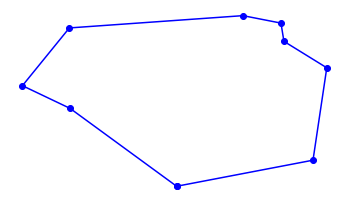

9 city tour with length 2075.1  for alltours_tsp


In [8]:
plot_tsp(alltours_tsp, Cities(9))

In [9]:
def alltours(cities):
    "Return a list of tours, each a permutation of cities, but each one starting with the same city."
    start = first(cities)
    print(start)
    return [[start] + Tour(rest)
            for rest in itertools.permutations(cities - {start})]

def first(collection):
    "Start iterating over collection, and return the first element."
    return next(iter(collection))

Tour = list  # Tours are implemented as lists of cities

In [10]:
# plot_tsp(alltours_tsp, Cities(8))
alltours(Cities(3))

(591+467j)


[[(591+467j), (586+61j), (253+179j)], [(591+467j), (253+179j), (586+61j)]]

Now let's try a much harder 10-city tour:

(30+534j)
[30.0, 333.0, 279.0, 441.0, 559.0, 782.0, 665.0, 97.0, 126.0, 26.0, 30.0]


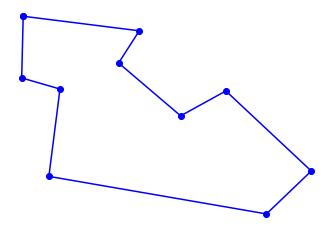

10 city tour with length 2291.8  for alltours_tsp
CPU times: user 1.54 s, sys: 56.7 ms, total: 1.6 s
Wall time: 1.62 s


In [11]:
%%time
plot_tsp(alltours_tsp, Cities(10))

# >>> Nearest Neighbor Heursitic

In [12]:
def nn_tsp(cities):
    start = first(cities)
    print('start ',start)
    tour = [start]
    unvisited = set(cities - {start})
    while unvisited:
        C = nearest_neighbor(tour[-1], unvisited) # stack
        tour.append(C)
        unvisited.remove(C)
    return tour

def nearest_neighbor(A, cities):
    return min(cities, key=lambda c: distance(c, A))

In [13]:
# %%time
nn_tsp(Cities(4))
# plot_tsp(alltours_tsp, Cities(10))
# print(Cities(10))

start  (388+188j)


[(388+188j), (529+378j), (226+545j), (763+117j)]

start  (30+534j)
[30.0, 26.0, 126.0, 279.0, 333.0, 441.0, 559.0, 782.0, 665.0, 97.0, 30.0]


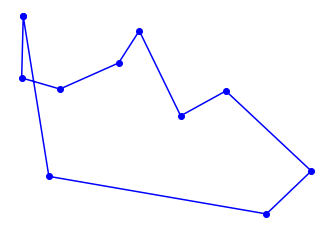

10 city tour with length 2381.4  for nn_tsp
start  (199+147j)
(199+147j)
CPU times: user 126 ms, sys: 6.78 ms, total: 133 ms
Wall time: 135 ms


In [14]:
%%time
plot_tsp(nn_tsp, Cities(10))
nn_tsp(Cities(8))
Cities(8)
print(first(Cities(8)))

In [15]:
def plot_tour(tour):
    "Plot the cities as circles and the tour as lines between them. Start city is red square."
    start = tour[0]
    plot_lines(list(tour) + [start])
    plot_lines([start], 'rs') # Mark the start city with a red square

start  (437+26j)
[437.0, 151.0, 23.0, 149.0, 615.0, 717.0, 725.0, 840.0, 803.0, 437.0]
[437.0]


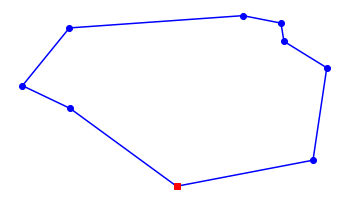

9 city tour with length 2075.1  for nn_tsp


In [16]:
plot_tsp(nn_tsp, Cities(9))

In [17]:
def length_ratio(cities): 
    "The ratio of the tour lengths for nn_tsp and alltours_tsp algorithms."
    return tour_length(nn_tsp(cities)) / tour_length(alltours_tsp(cities))

sorted(length_ratio(Cities(8, seed=i)) for i in range(0))

[]

start  (159+311j)
[159.0, 149.0, 155.0, 157.0, 146.0, 135.0, 113.0, 100.0, 103.0, 100.0, 122.0, 137.0, 134.0, 146.0, 136.0, 142.0, 133.0, 130.0, 129.0, 125.0, 134.0, 142.0, 120.0, 110.0, 113.0, 122.0, 137.0, 122.0, 116.0, 130.0, 128.0, 147.0, 164.0, 170.0, 177.0, 178.0, 197.0, 215.0, 250.0, 266.0, 274.0, 283.0, 287.0, 293.0, 304.0, 315.0, 319.0, 326.0, 326.0, 324.0, 313.0, 298.0, 281.0, 274.0, 250.0, 234.0, 232.0, 232.0, 206.0, 189.0, 181.0, 181.0, 168.0, 141.0, 114.0, 101.0, 82.0, 70.0, 74.0, 67.0, 82.0, 89.0, 83.0, 90.0, 81.0, 58.0, 39.0, 12.0, 8.0, 10.0, 1.0, 3.0, 9.0, 23.0, 20.0, 13.0, 15.0, 19.0, 17.0, 1.0, 5.0, 31.0, 34.0, 12.0, 47.0, 53.0, 90.0, 122.0, 125.0, 153.0, 157.0, 226.0, 242.0, 248.0, 251.0, 259.0, 268.0, 269.0, 276.0, 283.0, 296.0, 287.0, 265.0, 314.0, 321.0, 350.0, 361.0, 369.0, 387.0, 392.0, 392.0, 390.0, 368.0, 382.0, 388.0, 377.0, 357.0, 356.0, 350.0, 357.0, 336.0, 409.0, 426.0, 433.0, 410.0, 403.0, 423.0, 416.0, 421.0, 441.0, 445.0, 458.0, 468.0, 482.0, 487.0, 486

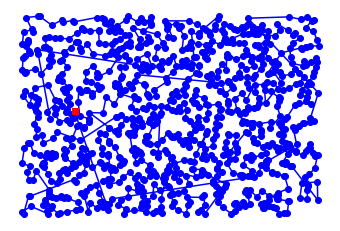

1000 city tour with length 21275.9  for nn_tsp
CPU times: user 219 ms, sys: 7.99 ms, total: 227 ms
Wall time: 226 ms


In [18]:
%%time
plot_tsp(nn_tsp, Cities(1000))